# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters. We will also use PCA for dimentionality reduction.

## Importing Libraries

In [1]:
#suppress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To visualise in the notebook
%matplotlib inline

In [3]:
# The dataset is large. To display all elements in the view.
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Reading the data 

In [4]:
# read the data file
telecom_df = pd.read_csv("telecom_churn_data.csv", index_col = 'mobile_number', parse_dates = True)

In [5]:
#inspect the data
telecom_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/14,7/31/14,8/31/14,9/30/14,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0

In [6]:
#Inspect the metadata
telecom_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 225 columns):
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                96062 non-null float64
offnet_mou_7   

## Data Cleaning

There are many gaps in the data. The dates are not of date type. Data correction has to be done.

In [7]:
#Find all the date columns to be converted to date format
date_cols = [col for col in telecom_df.columns if 'date' in col]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [8]:
telecom_df[date_cols] = telecom_df[date_cols].applymap(lambda x : pd.to_datetime(x, format = '%m/%d/%y'))

In [9]:
#Review the update of date columns
telecom_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 225 columns):
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8        98899 non-null datetime64[ns]
last_date_of_month_9        98340 non-null datetime64[ns]
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                96062 

In [10]:
#Review the change in data
telecom_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.

### Filtering High Value Customers

Deriving new feature as average recharge amount of good phase based on which we can filter the high value customers.

Filtering the high value customer as per requirement. High values customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [11]:
#Deriving the new attribute based on which we can filter high value customer
telecom_df['avg_rechrg_amt'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2

telecom_df = telecom_df[telecom_df.avg_rechrg_amt >= telecom_df.avg_rechrg_amt.quantile(0.7)]

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7000701601 to 7000498689
Columns: 226 entries, circle_id to avg_rechrg_amt
dtypes: datetime64[ns](12), float64(180), int64(34)
memory usage: 52.0 MB


In [12]:
#Create a dictionary of columns and a dataframe of unique values to easily ispect the dataset
df_dict = dict(zip([col for col in telecom_df.columns] , [pd.DataFrame(telecom_df[col].unique(), columns=[col]) for col in telecom_df.columns]))

In [13]:
# find the percentage of missing values and save them in a dataframe and sort descending
df = pd.DataFrame({"name": telecom_df.columns, "missing": (round(telecom_df.isnull().sum()/len(telecom_df)*100, 2))}).reset_index(drop = True)

In [14]:
#define a function to create a column of unique value count for the columns. This will be used to apply different imputing/cleaning methods.

def unique_count(row):
    if telecom_df[row.loc['name']].nunique()==1:
        return 1
    elif telecom_df[row.loc['name']].nunique()==2:
        return 2
    else:
        return 'many'

df['unique'] = df.apply(unique_count, axis = 1)
df[df['unique']==1]

,missing,name,unique
0,0.00,circle_id,1
1,0.38,loc_og_t2o_mou,1
2,0.38,std_og_t2o_mou,1
3,0.38,loc_ic_t2o_mou,1
4,0.00,last_date_of_month_6,1
5,0.10,last_date_of_month_7,1
6,0.52,last_date_of_month_8,1
7,1.20,last_date_of_month_9,1
60,1.05,std_og_t2c_mou_6,1
61,1.01,std_og_t2c_mou_7,1


In [15]:
# define a function to create a column of unique values in case of 1 or 2 unique values. Do not need to know the many unique values that can be inspected through the dictionary created
def unique_list(row):
    if telecom_df[row.loc['name']].nunique()<=2:
        return [telecom_df[row.loc['name']].unique()]
    else:
        return 'many'

df['unique_list'] = df.apply(unique_list, axis = 1)


In [16]:
#Shorten the dataframe to contain only missing value columns
df = df[df['missing']> 0]
df = df.sort_values(by = 'missing', ascending = False)
print(df)

     missing                      name unique  \
172    62.02           count_rech_3g_6   many   
160    62.02         total_rech_data_6   many   
156    62.02  date_of_last_rech_data_6   many   
192    62.02                 arpu_2g_6   many   
216    62.02                 fb_user_6      2   
164    62.02           max_rech_data_6   many   
168    62.02           count_rech_2g_6   many   
188    62.02                 arpu_3g_6   many   
196    62.02          night_pck_user_6      2   
176    62.02        av_rech_amt_data_6   many   
191    61.81                 arpu_3g_9   many   
179    61.81        av_rech_amt_data_9   many   
219    61.81                 fb_user_9      2   
175    61.81           count_rech_3g_9   many   
171    61.81           count_rech_2g_9   many   
167    61.81           max_rech_data_9   many   
163    61.81         total_rech_data_9   many   
195    61.81                 arpu_2g_9   many   
159    61.81  date_of_last_rech_data_9   many   
199    61.81        

In [17]:
df.shape

(166, 4)

In [18]:
#Segment the dataframe
df_single = df[df['unique']== 1]
df_double = df[df['unique']== 2]

In [19]:
#First we deal with single unique value columns
df_single

,missing,name,unique,unique_list
115,5.68,std_ic_t2o_mou_9,1,"[[nan, 0.0]]"
63,5.68,std_og_t2c_mou_9,1,"[[nan, 0.0]]"
62,3.13,std_og_t2c_mou_8,1,"[[0.0, nan]]"
114,3.13,std_ic_t2o_mou_8,1,"[[0.0, nan]]"
7,1.20,last_date_of_month_9,1,"[[2014-09-30T00:00:00.000000000, NaT]]"
112,1.05,std_ic_t2o_mou_6,1,"[[0.0, nan]]"
60,1.05,std_og_t2c_mou_6,1,"[[0.0, nan]]"
61,1.01,std_og_t2c_mou_7,1,"[[0.0, nan]]"
113,1.01,std_ic_t2o_mou_7,1,"[[0.0, nan]]"
6,0.52,last_date_of_month_8,1,"[[2014-08-31T00:00:00.000000000, NaT]]"


In [20]:
# Drop the columns (except date column) that have only 1 value
drop_cols = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'] 
telecom_df.drop(drop_cols, axis = 1, inplace = True)

In [21]:
telecom_df.shape

(30011, 214)

In [22]:
#Count the number of churners in the dataset
len(telecom_df[(telecom_df['total_ic_mou_9'] == 0.0) & ( telecom_df['total_og_mou_9'] == 0.0 ) & (telecom_df['vol_2g_mb_9'] == 0.0 ) & (telecom_df['vol_3g_mb_9'] ==0.0 )].index)

2593

In [23]:
#Create the churn column
telecom_df['churn'] = np.where((telecom_df['total_ic_mou_9'] == 0.0) & ( telecom_df['total_og_mou_9'] == 0.0 ) & (telecom_df['vol_2g_mb_9'] == 0.0 ) & (telecom_df['vol_3g_mb_9'] ==0.0 ),1,0)

In [24]:
#Percentage of churned customer
100*(sum(telecom_df['churn'])/len(telecom_df.index))

8.64016527273333

In [25]:
# Fill date using forward fill method as there is only one date in last date of the month columns

# last_date_cols = ['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_8']
# telecom_df[last_date_cols].fillna( method ='ffill', inplace = True)
telecom_df['last_date_of_month_7'].fillna( method ='ffill', inplace = True)
telecom_df['last_date_of_month_8'].fillna( method ='ffill', inplace = True)
telecom_df['last_date_of_month_9'].fillna( method ='ffill', inplace = True)

In [26]:
#telecom_df['last_date_of_month_7'].unique()
#telecom_df['last_date_of_month_8'].unique()
telecom_df['last_date_of_month_9'].unique()

array(['2014-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
df_double

,missing,name,unique,unique_list
216,62.02,fb_user_6,2,"[[nan, 1.0, 0.0]]"
196,62.02,night_pck_user_6,2,"[[nan, 1.0, 0.0]]"
219,61.81,fb_user_9,2,"[[nan, 1.0, 0.0]]"
199,61.81,night_pck_user_9,2,"[[nan, 0.0, 1.0]]"
217,61.14,fb_user_7,2,"[[nan, 1.0, 0.0]]"
197,61.14,night_pck_user_7,2,"[[nan, 0.0, 1.0]]"
198,60.83,night_pck_user_8,2,"[[nan, 0.0, 1.0]]"
218,60.83,fb_user_8,2,"[[nan, 1.0, 0.0]]"


In [28]:
two_value_cols = df_double['name'].tolist()

In [29]:
type(two_value_cols)

list

In [30]:
two_value_cols

['fb_user_6',
 'night_pck_user_6',
 'fb_user_9',
 'night_pck_user_9',
 'fb_user_7',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_8']

In [31]:
telecom_df[two_value_cols].count()

fb_user_6           11397
night_pck_user_6    11397
fb_user_9           11461
night_pck_user_9    11461
fb_user_7           11662
night_pck_user_7    11662
night_pck_user_8    11754
fb_user_8           11754
dtype: int64

In [32]:
#Find the mode of two value columns
mode = telecom_df[two_value_cols].mode()
mode

,fb_user_6,night_pck_user_6,fb_user_9,night_pck_user_9,fb_user_7,night_pck_user_7,night_pck_user_8,fb_user_8
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
# replace the null values in each of these columns with the mode values
telecom_df[two_value_cols] = telecom_df[two_value_cols].fillna(mode.iloc[0])

In [34]:
#Inspect the update
telecom_df[two_value_cols].isnull().sum()

fb_user_6           0
night_pck_user_6    0
fb_user_9           0
night_pck_user_9    0
fb_user_7           0
night_pck_user_7    0
night_pck_user_8    0
fb_user_8           0
dtype: int64

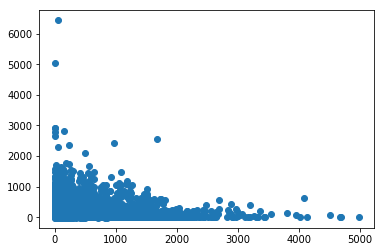

In [35]:
#Check if any correlation exists beltween incoming and data arpu
plt.scatter(telecom_df['total_ic_mou_6'], telecom_df['arpu_2g_6'])

In [36]:
#Check if data arpu is correlated with arpu so that those columns could be dropped
arpu_6 = telecom_df[['arpu_6', 'arpu_2g_6','arpu_3g_6']].reset_index(drop = True)
arpu_6.head()

,arpu_6,arpu_2g_6,arpu_3g_6
0,1069.180,NaN,NaN
1,378.721,NaN,NaN
2,492.846,NaN,NaN
3,430.975,NaN,NaN
4,690.008,NaN,NaN


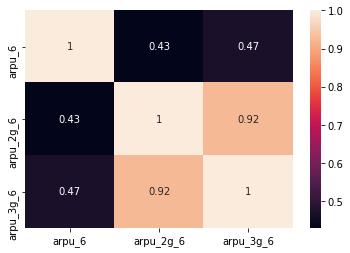

In [37]:
#create the heatmap for arpu of month 6
sns.heatmap(arpu_6.corr(), annot= True)

There is correlation between 2g and 3g arpu but not much with base arpu hence keeping the arpu columns

In [38]:
#Find the rows which have high number of missing values
100*(len(telecom_df[telecom_df.isnull().sum(axis=1) >= 50].index)/len(telecom_df.index))

5.521308853420413

In [39]:
#4.9 % data is having 50 or more columns as NaN but that could be because no transaction for those cell took place so will impute those to 0 or mode.


In [40]:
#Compute missing again
# find the percentage of missing values and save them in a dataframe and sort descending
df_missing = pd.DataFrame({"name": telecom_df.columns, "missing": (round(telecom_df.isnull().sum()/len(telecom_df)*100, 2))}).reset_index(drop = True)

In [41]:
df_missing = df_missing[df_missing['missing']> 0]

def compute_mode(row):
    return telecom_df[row.loc['name']].mode()
df_missing['mode'] = df_missing.apply(compute_mode, axis = 1)

df_missing.sort_values(by = 'missing', ascending = False)

,missing,name,mode
152,62.02,max_rech_data_6,154
176,62.02,arpu_3g_6,0
156,62.02,count_rech_2g_6,1
148,62.02,total_rech_data_6,1
160,62.02,count_rech_3g_6,0
180,62.02,arpu_2g_6,0
164,62.02,av_rech_amt_data_6,154
144,62.02,date_of_last_rech_data_6,NaT
151,61.81,total_rech_data_9,1
155,61.81,max_rech_data_9,252


In [42]:
#Find date columns for recharge dates
date_cols_rech = [col for col in df_missing.name if 'date' in col]
print(date_cols_rech)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [43]:
#There are small number of rows with last date of rechage missing. Impute these with the last date of the month
last_date_cols = ['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
last_rech_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
last_date_dict = dict(zip(last_rech_date, last_date_cols))
# telecom_df['date_of_last_rech_6'] = telecom_df['date_of_last_rech_6'].fillna(telecom_df['last_date_of_month_6'])
last_data_rech_date = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
last_date_data_dict = dict(zip(last_data_rech_date, last_rech_date))
# First fill small gaps in the last recharge date
for k,v in last_date_dict.items():
    
    telecom_df[k] = telecom_df[k].fillna(telecom_df[v])
# Fill the gaps in last date for data recharge from last recharge date as these are high number of gaps and can be assumed to be the same as the last recharge date

for k,v in last_date_data_dict.items():
    
    telecom_df[k] = telecom_df[k].fillna(telecom_df[v])


telecom_df[date_cols].isnull().sum()

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
last_date_of_month_9        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_9         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
date_of_last_rech_data_9    0
dtype: int64

In [44]:
#Compute missing again
# find the percentage of missing values and save them in a dataframe and sort descending
df_missing2 = pd.DataFrame({"name": telecom_df.columns, "missing": (round(telecom_df.isnull().sum()/len(telecom_df)*100, 2))}).reset_index(drop = True)
df_missing2 = df_missing2[df_missing2['missing']> 0]

def compute_mode(row):
    return telecom_df[row.loc['name']].mode()
df_missing2['mode'] = df_missing2.apply(compute_mode, axis = 1)

df_missing2.sort_values(by = 'missing', ascending = False)

,missing,name,mode
180,62.02,arpu_2g_6,0.0
160,62.02,count_rech_3g_6,0.0
164,62.02,av_rech_amt_data_6,154.0
148,62.02,total_rech_data_6,1.0
176,62.02,arpu_3g_6,0.0
152,62.02,max_rech_data_6,154.0
156,62.02,count_rech_2g_6,1.0
151,61.81,total_rech_data_9,1.0
159,61.81,count_rech_2g_9,1.0
167,61.81,av_rech_amt_data_9,252.0


In [45]:
#Find the remaining missing cols
remaining_cols = df_missing2.name.tolist()
len(remaining_cols)

136

In [46]:
telecom_df.shape

(30011, 215)

In [47]:
remaining_cols1 = remaining_cols[0:44]
remaining_cols2 = remaining_cols[44:90]
remaining_cols3 = remaining_cols[90:]

In [48]:
#Using imputer 
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# imp.fit(telecom_df[remaining_cols])
# telecom_df[remaining_cols] = imp.transform(telecom_df[remaining_cols])

In [49]:
# impute with 0 values as mode for most of the columns is 0 and we cannot impute the value of recharge and calls data with mode.
# It seems that where there is no transaction, no data is captured for that column as there are large number of columns
telecom_df[remaining_cols1] = telecom_df[remaining_cols1].fillna(0)

In [50]:
# impute with 0 values
telecom_df[remaining_cols2] = telecom_df[remaining_cols2].fillna(0)

In [51]:
# impute with 0 values
telecom_df[remaining_cols3] = telecom_df[remaining_cols3].fillna(0)

In [52]:
#Check if all data elements are not null
assert pd.notnull(telecom_df).all().all()

In [53]:
# Feature engineering
# Onnet offnet ratio - this could be an indicator of churn
#However since there are large number of 0s resulting into infinity, so ignoring these.

# telecom_df['ratio_onnet_offnet_6'] = telecom_df['onnet_mou_6']/telecom_df['offnet_mou_6']
# telecom_df['ratio_onnet_offnet_7'] = telecom_df['onnet_mou_7']/telecom_df['offnet_mou_7']
# telecom_df['ratio_onnet_offnet_8'] = telecom_df['onnet_mou_8']/telecom_df['offnet_mou_8']
# telecom_df['ratio_onnet_offnet_9'] = telecom_df['onnet_mou_9']/telecom_df['offnet_mou_9']


# ratio of max recharge amount to last day recharge amount

In [54]:
# total incoming to total outgoing ratio
# this could be an indicator of churn
#However since there are large number of 0s resulting into infinity, so ignoring these.
# telecom_df['ratio_incoming_outgoing_6'] = telecom_df['total_ic_mou_6']/telecom_df['total_og_mou_6']
# telecom_df['ratio_incoming_outgoing_7'] = telecom_df['total_ic_mou_7']/telecom_df['total_og_mou_7']
# telecom_df['ratio_incoming_outgoing_8'] = telecom_df['total_ic_mou_8']/telecom_df['total_og_mou_8']
# telecom_df['ratio_incoming_outgoing_9'] = telecom_df['total_ic_mou_9']/telecom_df['total_og_mou_9']


In [55]:
# Days before last day of the month for last date of recharge.
# If the user is regular this number is expected to small. In chase of churners this will be large
telecom_df['days_6'] = (telecom_df['last_date_of_month_6'] - telecom_df['date_of_last_rech_6']).dt.days.astype(int)
telecom_df['days_7'] = (telecom_df['last_date_of_month_7'] - telecom_df['date_of_last_rech_7']).dt.days.astype(int)
telecom_df['days_8'] = (telecom_df['last_date_of_month_8'] - telecom_df['date_of_last_rech_8']).dt.days.astype(int)
telecom_df['days_9'] = (telecom_df['last_date_of_month_9'] - telecom_df['date_of_last_rech_9']).dt.days.astype(int)

In [56]:
# Days before last day of the month for last date of data recharge
telecom_df['data_days_6'] = (telecom_df['last_date_of_month_6'] - telecom_df['date_of_last_rech_data_6']).dt.days.astype(int)
telecom_df['data_days_7'] = (telecom_df['last_date_of_month_7'] - telecom_df['date_of_last_rech_data_7']).dt.days.astype(int)
telecom_df['data_days_8'] = (telecom_df['last_date_of_month_8'] - telecom_df['date_of_last_rech_data_8']).dt.days.astype(int)
telecom_df['data_days_9'] = (telecom_df['last_date_of_month_9'] - telecom_df['date_of_last_rech_data_9']).dt.days.astype(int)

In [57]:
#Drop date columns

In [58]:
telecom_df = telecom_df.drop(date_cols, axis = 1)

In [59]:
telecom_df.shape

(30011, 211)

## Removing all the attributes corresponding to the churn phase.

In [60]:
#Drop attributes for churn month
churn_cols = [col for col in telecom_df.columns if col[-1]=='9']
churn_cols.append('sep_vbc_3g')
print(churn_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'days_9', 'data_days_9', 'sep_vbc_3g']


In [61]:
telecom_df = telecom_df.drop(churn_cols, axis = 1)
telecom_df.shape

(30011, 159)

In [62]:
#Saving the file
telecom_df.to_csv('telecom_data_clean2.csv',sep=',')

In [63]:
#Look at the statistics for numeric columns
telecom_df.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,churn,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,

In [64]:
#There seem to be outliers in the model. Will create one model without outliers and one with outliers as these seem like natural outliers.
#Find the bounds for outliers
lower_bound = .01
upper_bound = .99
quant_df = telecom_df.quantile([lower_bound, upper_bound])

In [65]:
quant_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,churn,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
0.01,18.2319,25.7827,0.0000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,0.000,0.000,0.000,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,1983.0895,1999.3745,1987.9344,2166.37,2220.367,2188.504,2326.29,2410.104,2211.642,349.353,292.54,288.485,543.709,448.125,432.743,1076.242,1059.875,956.502,1147.05,1112.661,1092.586,90.875,91.055,86.68,24.857,28.235,28.871,1806.938,1761.425,1689.069,1885.198,1919.19,1938.13,1955.612,2112.664,1905.805,44.385,43.885,38.882,2744.491,2874.65,2800.87,41.25,40.425,31.24,71.355,79.869,74.112,9.308,0.0,0.0,3217.681,3287.36,3251.785,625.35,648.793,621.667,1026.435,1009.29,976.091,197.17,205.253,185.62,1484.992,1515.866,1459.553,215.643,231.149,215.199,393.725,408.575,372.607,53.385,56.59,49.409,577.89,616.886,563.89,1746.851,1806.663,1746.224,0.68,0.51,0.61,239.6,240.125,249.888,20.708,25.258,21.53,48.0,48.0,46.0,2376.0,2426.9,2341.9,1000.0,1000.0,951.0,655.0,655.0,619.0,10.0,11.0,10.0,455.0,455.0,455.0,9.0,9.0,9.0,4.0,5.0,5.0,778.3,868.2,855.0,1314.233,1344.167,1256.619,3568.217,3759.153,3790.385,798.301,81

In [66]:
telecom_df.shape

(30011, 159)

In [67]:
#Do this for only numeric columns
date_cols = [col for col in telecom_df.columns if 'date' in col]
numeric_cols = [item for item in telecom_df.columns if item not in date_cols]

In [68]:
#Create the rule
filtering_rule_2 = telecom_df[numeric_cols].apply(lambda x: (x < quant_df.loc[lower_bound, x.name]) |  (x > quant_df.loc[upper_bound, x.name]), axis=0)

In [69]:
#Create the filtered dataframe
filtered_df = telecom_df[~(filtering_rule_2).any(axis=1)]

In [70]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16613 entries, 7001524846 to 7001453306
Columns: 159 entries, arpu_6 to data_days_8
dtypes: float64(127), int64(32)
memory usage: 20.3 MB


In [71]:
filtered_df.describe(percentiles = [.25,.5,.75,.90,.95,.99])
# Now the rate of growth is not abrupt

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,churn,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
count,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.0,16613.0,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.00000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.0,16613.0,16613.000000,16613.000000,16613.000000,16613

In [72]:
#Find the % of churners remaining. This is not too different from the base dataset.
100*(sum(filtered_df.churn)/len(filtered_df.index))

7.680731956901223

In [73]:
filtered_df.shape

(16613, 159)

## Feature Standardisation

In [74]:
#Normalising continuous features
df = filtered_df.drop(['churn'],axis=1)

In [75]:
numeric_cols.remove('churn')
df = df[numeric_cols]

In [76]:
normalised_df = (df-df.mean())/df.std()
normalised_df.shape

(16613, 158)

In [77]:
filtered_df = filtered_df.drop(numeric_cols,axis =1)


In [78]:
telecom_df1 = pd.concat([filtered_df,normalised_df],axis =1)
telecom_df1.describe()

,churn,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
count,16613.000000,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,0.0,0.0,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,1.661300e+04,0.0,0.0,1.661300e+04,1.661300e+04,1.661300e+04,1.66130

In [79]:
#After outlier removal some columns now have NaN or only 0 values. Deleting the same.
telecom_df1 = telecom_df1.drop(['og_others_7','og_others_8', 'night_pck_user_7', 'night_pck_user_8'], axis = 1)

In [80]:
#Save the file
telecom_df1.to_csv('telecom_data_clean3.csv',sep=',')

## Model Buliding

Splitting the Data into trining and testing set

### Splitting Data into Traning and Test set

In [81]:

#Create test and train data split
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_df1.drop(['churn'],axis=1)

# Putting response variable to y
y=telecom_df1['churn']

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,-0.563035,-0.042959,-1.202708,0.470309,0.249031,-0.620828,-0.843545,-0.888775,-0.596892,-0.290953,-0.257215,-0.259804,-0.312451,-0.284266,-0.280527,1.974996,1.314253,-0.518613,-0.460648,-0.536548,-0.586491,-0.449826,-0.453688,-0.446635,-0.325149,-0.330443,1.906515,0.570141,0.194852,-0.675655,-0.206721,-0.173456,-0.448622,-0.562784,-0.581831,-0.292098,-0.230095,-0.228311,-0.220859,-0.530420,-0.519978,-0.506233,-0.126096,-0.121537,-0.10532,-0.477718,-0.519586,0.672665,-0.379851,-0.240492,-0.445977,-0.824776,-0.412746,-0.623361,-0.728770,-0.553686,-0.883137,-0.820760,-0.484510,-0.489978,-0.482002,-0.622035,-0.950115,-0.927223,-0.449188,-0.426678,-0.422050,0.017862,-0.453377,-0.510321,-0.271209,-0.277497,-0.270809,-0.198877,-0.565193,-0.596895,-0.656841,-1.064768,-1.031781,-0.42799,-0.183096,-0.243036,-0.241137,-0.254492,-0.242083,-0.257601,-0.260143,-0.253661,1.089789,1.354353,0.626582,-0.605096,0.035723,-1.244133,-0.555327,0.071051,-1.112782,-0.493197,-1.055330,-0.809458,-0.501031,0.954386,1.626515,-0.5244,1.371876,-0.221118,-0.402327,1.192916,1.890410,-0.354451,-0.353346,-0.338019,-0.49947,0.907538,0.089409,-0.305419,2.226463,-0.286921,-0.35243,1.444520,-0.328789,-0.335115,-0.335535,-0.107317,-0.352682,-0.352786,-0.339643,-0.05549,-0.296263,2.790328,-0.284824,-0.327776,0.487723,2.006321,-0.292316,-0.29775,-0.289746,-0.206978,-0.198868,-0.182956,0.210666,0.218644,0.280395,-1.014635,-0.241913,3.481218,0.242556,-0.348651,0.566708,-0.866439,-0.626027,-0.011618,-0.845576,0.250933
7000875565,-0.324088,-0.922570,-1.006852,-0.657389,-0.583594,-0.509169,-0.225899,-0.437687,-0.513862,-0.290953,-0.139744,-0.259804,

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [83]:
X_train.shape

(11629, 154)

Since, we have large number of features we will reduce the features unsing PCA.

### PCA on Data

While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet.
So we'll calculate the PCs using the train data, and apply them later on the test data

In [84]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [85]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them

We'll plot original features on the first 2 principal components as axes

In [86]:
pca.components_

array([[ 2.87948913e-02,  2.48897937e-02,  4.37806531e-02, ...,
         9.84428410e-02,  8.92659434e-02,  7.70634001e-02],
       [ 6.76716779e-02,  8.35072809e-02,  1.00457742e-01, ...,
        -3.08413142e-02, -3.79353505e-02, -2.21139893e-02],
       [ 1.55135001e-01,  2.08464543e-01,  1.93272691e-01, ...,
        -1.02725155e-02, -8.99743342e-03, -1.03210923e-02],
       ...,
       [ 0.00000000e+00,  1.28364978e-16,  8.32150737e-17, ...,
         8.82750455e-17, -2.44129686e-16,  1.64958254e-17],
       [-0.00000000e+00,  6.10402367e-17, -1.01934621e-16, ...,
        -1.16961039e-16,  1.84435265e-17,  3.11860028e-18],
       [-0.00000000e+00,  4.14906510e-16, -1.79257592e-16, ...,
         6.30824484e-17,  3.51029298e-17, -7.61232122e-17]])

In [87]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.028795,0.067672
1,arpu_7,0.024890,0.083507
2,arpu_8,0.043781,0.100458
3,onnet_mou_6,-0.075430,0.011957
4,onnet_mou_7,-0.079568,0.016499


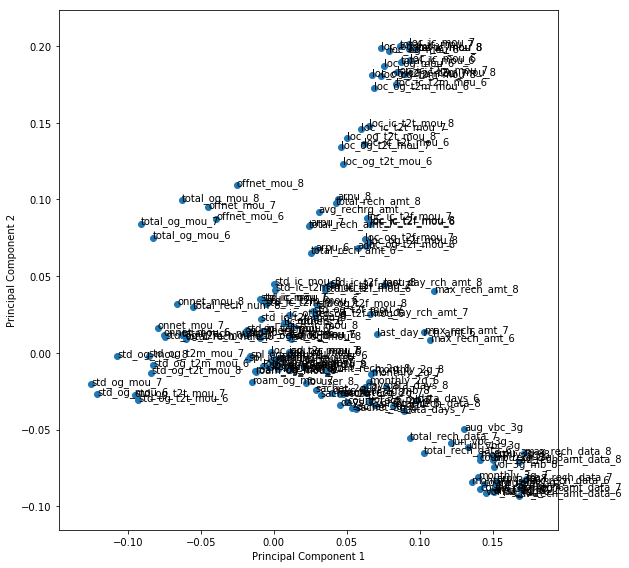

In [88]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [89]:
pca.explained_variance_ratio_

array([1.29473923e-01, 9.11051557e-02, 6.65086851e-02, 4.69616464e-02,
       3.56955345e-02, 3.27926750e-02, 2.68258557e-02, 2.56933060e-02,
       2.21952005e-02, 1.96540882e-02, 1.83571683e-02, 1.67069550e-02,
       1.63067518e-02, 1.59854127e-02, 1.51661659e-02, 1.49904312e-02,
       1.41381948e-02, 1.30613869e-02, 1.25919389e-02, 1.14990041e-02,
       1.08504734e-02, 1.04597518e-02, 1.00782398e-02, 9.74189587e-03,
       9.66712926e-03, 9.30704183e-03, 9.05113812e-03, 8.70131730e-03,
       7.98001636e-03, 7.74324549e-03, 7.65602478e-03, 7.26719247e-03,
       7.03935927e-03, 7.03112729e-03, 6.81276270e-03, 6.65066803e-03,
       6.60600678e-03, 6.47827602e-03, 6.43236752e-03, 6.04735241e-03,
       5.94244391e-03, 5.84647153e-03, 5.61059805e-03, 5.34197115e-03,
       5.23476941e-03, 5.13095258e-03, 4.99375788e-03, 4.84849842e-03,
       4.73071078e-03, 4.67965636e-03, 4.57617897e-03, 4.36497528e-03,
       4.30179894e-03, 4.19336777e-03, 4.12184754e-03, 4.03202727e-03,
      

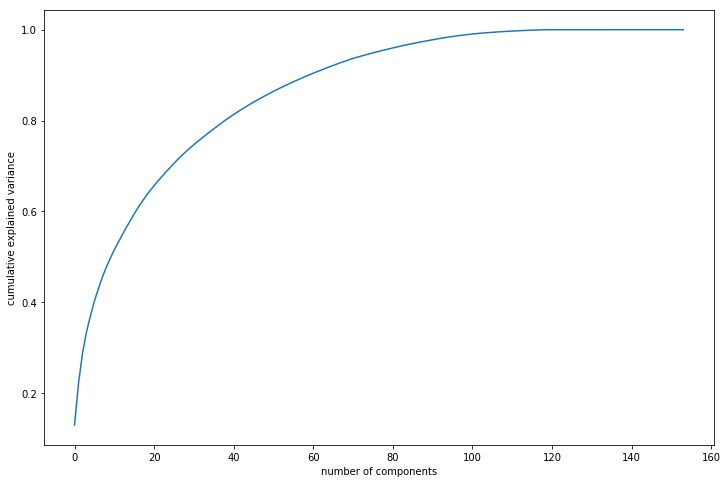

In [90]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [91]:
pca_2 = PCA(0.90)

In [92]:
df_train_pca2 = pca_2.fit_transform(X_train)
df_train_pca2.shape

(11629, 60)

In [93]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca2.transpose())

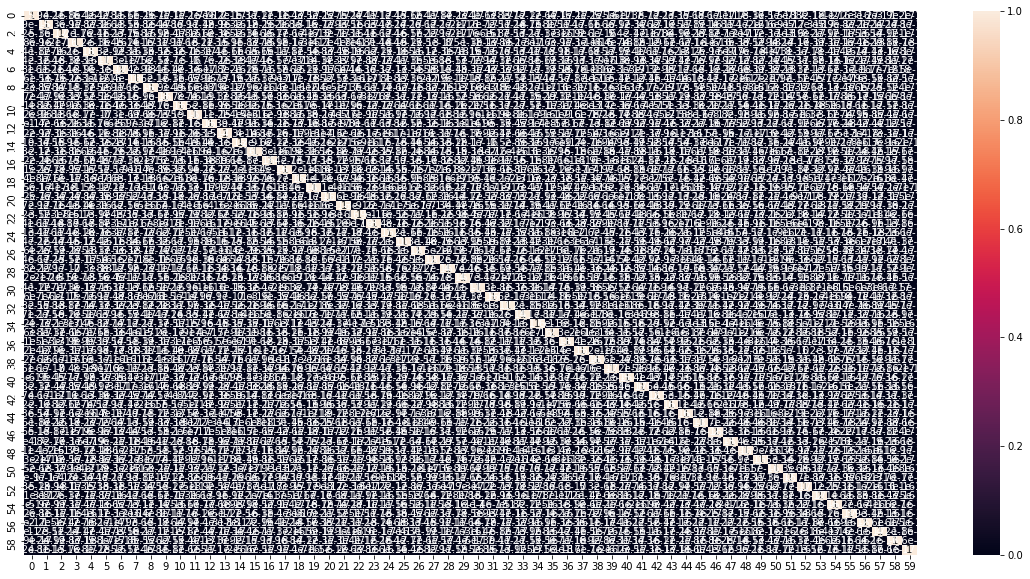

In [94]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [95]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.2440459424590854e-15 , min corr:  -1.1710760069479867e-15


We effectively have removed multicollinearity from our situation.

In [96]:
#Applying selected components to the test data - 60 components
df_test_pca2 = pca_2.transform(X_test)
df_test_pca2.shape

(4984, 60)

#### Applying a logistic regression on our Principal Components

In [97]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca2,y_train)

In [98]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(df_test_pca2)
# "{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

In [99]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000399
1,0.046624
2,0.001574
3,0.013110
4,0.023764


In [100]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rechrg_amt,days_6,days_7,days_8,data_days_6,data_days_7,data_days_8
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7002327614,-0.015154,0.171381,0.089207,-0.618576,-0.602469,-0.462343,-0.323311,0.020843,0.283328,0.210449,-0.257215,-0.259804,-0.312451,-0.284266,-0.280527,-0.508479,-0.467418,-0.319629,0.041214,1.039403,1.081053,-0.188760,0.183206,0.037117,-0.325149,-0.330443,-0.322745,-0.216504,0.555529,0.650519,-0.423539,-0.437871,-0.352323,-0.309377,-0.523603,-0.301400,-0.230095,-0.228311,-0.220859,-0.509110,-0.667198,-0.444520,-0.126096,-0.121537,-0.10532,-0.477718,-0.519586,-0.511109,-0.379851,-0.650435,-0.407280,-0.103120,-0.666295,-0.353251,-0.440805,-0.512731,-0.159744,0.088739,-0.243216,-0.214668,0.080782,-0.658735,-0.276525,-0.083453,0.876538,1.527259,-0.061359,0.131565,-0.179867,0.733278,-0.212446,-0.000229,-0.270809,0.455101,0.526528,0.519522,-0.265515,-0.109936,0.206852,-0.427990,-0.183096,-0.243036,3.173585,0.241894,2.030186,-0.257601,-0.260143,-0.253661,-0.721262,-0.270871,0.082761,-0.099952,-0.083812,-0.039965,1.105799,1.055426,1.153573,-0.288464,-0.292096,-0.920681,0.334759,3.857075,5.180731,2.660987,2.584161,2.696495,-0.402327,3.589954,4.976478,1.672568,1.633838,1.747207,1.624810,2.432295,1.176880,0.018191,-0.269600,-0.275812,1.668012,1.035495,2.408837,1.961223,2.563030,2.035337,2.160374,2.146755,2.309473,-0.05549,-0.296263,-0.305833,-0.284824,-0.327776,3.784458,5.171058,2.222568,2.157096,2.289859,-0.206978,-0.198868,-0.182956,0.210666,0.218644,0.280395,0.547202,-0.188688,-0.309895,1.275548,-0.113957,-0.254367,-0.600137,-0.626027,1.563923,-0.084546,-0.749006
7001545498,-0.004472,0.035246,0.037642,1.712925,2.018155,1.968668,-0.874699,-0.964072,-0.922693,-0.290953,-0.257215,-0.259804,-0.312451,-0.284266,-0.280527,

In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
mobile_number,
7002327614,0
7001545498,0
7000672997,0
7002025093,0
7000824788,0


In [102]:
y_test

mobile_number
7002327614    0
7001545498    0
7000672997    0
7002025093    0
7000824788    0
7000271734    0
7001915741    0
7000939144    0
7002398289    0
7002127776    0
7000214360    0
7000300077    1
7000396267    0
7002276240    0
7000950618    0
7001344199    0
7000739298    0
7000890347    0
7000939452    0
7000767323    0
7002209346    0
7001669827    0
7000998704    0
7001959171    0
7000930902    0
7001430008    0
7001151590    0
7001374962    0
7001923449    0
7001423205    0
7000281087    0
7002229348    0
7000305490    1
7000178500    0
7000931604    0
7001864905    0
7001030916    1
7001734832    0
7000632206    0
7002075579    0
7000445019    0
7000746065    0
7001965579    0
7001237980    0
7001312664    0
7002064773    0
7000263939    0
7002304784    0
7000817628    0
7000217860    0
7000327107    0
7000908248    0
7000482961    0
7000358794    0
7001399015    0
7000395982    0
7001409566    0
7000479750    0
7000501525    0
7000650253    0
7001010460    0
7001331707

In [103]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index

y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,churn,mobile_number
0,0,7002327614
1,0,7001545498
2,0,7000672997
3,0,7002025093
4,0,7000824788


In [104]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,churn,Churn_Prob
0,7002327614,0,0.000399
1,7001545498,0,0.046624
2,7000672997,0,0.001574
3,7002025093,0,0.013110
4,7000824788,0,0.023764


In [105]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.08 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,churn,Churn_Prob,predicted
0,7002327614,0,0.000399,0
1,7001545498,0,0.046624,0
2,7000672997,0,0.001574,0
3,7002025093,0,0.013110,0
4,7000824788,0,0.023764,0


In [106]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[3789,  790],
       [  64,  341]])

In [107]:
# Predicted     not_churn    churn
# Actual
# not_churn        4485      94
# churn            282       123 

In [108]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8286516853932584

In [109]:
tn, fp, fn, tp = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted).ravel()

In [110]:
print(tn, fp, fn, tp)

3789 790 64 341


In [111]:
# Let's see the sensitivity of our logistic regression model
tp / float(tp+fn)

0.8419753086419753

In [187]:
# Let us calculate specificity
tn / float(tn+fp)

0.8274732474339376

The model gives good sensitivity and specitivity

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,mobile_number,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7002327614,0,0.000399,0,1,0,0,0,0,0,0,0,0,0
1,7001545498,0,0.046624,0,1,0,0,0,0,0,0,0,0,0
2,7000672997,0,0.001574,0,1,0,0,0,0,0,0,0,0,0
3,7002025093,0,0.013110,0,1,0,0,0,0,0,0,0,0,0
4,7000824788,0,0.023764,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081260  1.000000  0.000000
0.1   0.1  0.855538  0.802469  0.860231
0.2   0.2  0.910514  0.711111  0.928150
0.3   0.3  0.919944  0.562963  0.951518
0.4   0.4  0.925361  0.437037  0.968552
0.5   0.5  0.924559  0.303704  0.979472
0.6   0.6  0.921348  0.170370  0.987770
0.7   0.7  0.921750  0.079012  0.996287
0.8   0.8  0.920947  0.039506  0.998908
0.9   0.9  0.919342  0.009877  0.999782


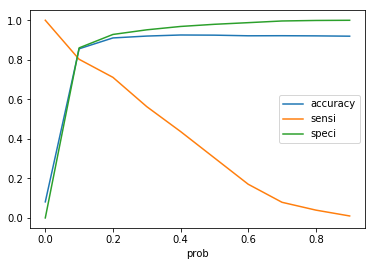

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [116]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

In [117]:
y_pred_final.head()

,mobile_number,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,7002327614,0,0.000399,0,1,0,0,0,0,0,0,0,0,0,0
1,7001545498,0,0.046624,0,1,0,0,0,0,0,0,0,0,0,0
2,7000672997,0,0.001574,0,1,0,0,0,0,0,0,0,0,0,0
3,7002025093,0,0.013110,0,1,0,0,0,0,0,0,0,0,0,0
4,7000824788,0,0.023764,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.8926565008025682

In [119]:
metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

array([[4145,  434],
       [ 101,  304]])

In [138]:
tn, fp, fn, tp = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted).ravel()

In [139]:
# Let's see the sensitivity of our logistic regression model
tp / float(tp+fn)

0.8419753086419753

# Now creating another model using KFolds to account for unbalanced class

In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = { 'C': np.power(10.0, np.arange(-10, 10))}

# instantiate the model
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000)

# fit regression on training data
gs = GridSearchCV(clf, parameters, scoring='f1', cv=n_folds)

gs.fit(df_train_pca2,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [141]:
# scores of GridSearch CV
scores = gs.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.056838,0.003711,0.289852,0.289311,1e-10,{'C': 1e-10},17,0.299803,0.292003,0.297552,0.285224,0.278530,0.287173,0.295082,0.298382,0.281081,0.282751,0.269373,0.290925,0.282398,0.289198,0.314894,0.290428,0.280374,0.287921,0.299424,0.289110,0.025068,0.003803,0.012940,0.003996
1,0.042478,0.001447,0.289852,0.289317,1e-09,{'C': 1e-09},17,0.299803,0.292003,0.297552,0.285224,0.278530,0.287234,0.295082,0.298382,0.281081,0.282751,0.269373,0.290925,0.282398,0.289198,0.314894,0.290428,0.280374,0.287921,0.299424,0.289110,0.007120,0.000445,0.012940,0.003993
2,0.034100,0.001059,0.289906,0.289362,1e-08,{'C': 1e-08},16,0.299803,0.292130,0.297552,0.285224,0.279070,0.287295,0.295082,0.298514,0.281081,0.282751,0.269373,0.290987,0.282398,0.289198,0.314894,0.290428,0.280374,0.287921,0.299424,0.289172,0.009528,0.000224,0.012893,0.004030
3,0.030701,0.001091,0.290391,0.289938,1e-07,{'C': 1e-07},15,0.300395,0.292576,0.298113,0.285899,0.280156,0.287846,0.295082,0.299377,0.282098,0.283531,0.269373,0.291613,0.282946,0.289507,0.314894,0.290996,0.281426,0.287986,0.299424,0.290043,0.003334,0.000203,0.012708,0.004071
4,0.043043,0.001328,0.295264,0.295166,1e-06,{'C': 1e-06},14,0.304609,0.298488,0.298851,0.291658,0.286282,0.292672,0.301887,0.304486,0.286765,0.287683,0.275992,0.297173,0.285714,0.294889,0.321041,0.297285,0.286807,0.292597,0.304687,0.294728,0.005237,0.000324,0.012587,0.004334


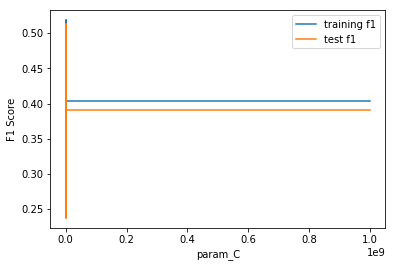

In [142]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training f1")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test f1")
plt.xlabel("param_C")
plt.ylabel("F1 Score")
plt.legend()

In [144]:
# printing the optimal accuracy score and hyperparameters
print('We can get F1 of',gs.best_score_,'using',gs.best_params_)

We can get F1 of 0.5131015589971976 using {'C': 0.0001}


In [145]:
# model with the best hyperparameters
lr = LogisticRegression(C=0.0001)

In [146]:
#fit train data
lr.fit(df_train_pca2,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [147]:
# predict
predictions = lr.predict(df_test_pca2)
print("{:2.2}".format(metrics.roc_auc_score(y_test, predictions)))

0.76


This model has good ROC score and can be used for predictions but it is not better than the base Logistics regression model

## Random Forest Model

#### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [148]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [149]:
# fit
rfc.fit(df_train_pca2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [150]:
predictions = rfc.predict(df_test_pca2)

In [151]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [155]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      4579
          1       0.52      0.11      0.18       405

avg / total       0.89      0.92      0.89      4984



In [156]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[4538   41]
 [ 361   44]]


In [157]:
print(accuracy_score(y_test,predictions))

0.9193418940609952


#### Hyperparameter Tuning

Tuning max_depth

In [158]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [159]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.160704,0.005435,0.000000,0.000000,2,{'max_depth': 2},4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047094,0.002755,0.000000,0.000000
1,0.309777,0.003588,0.094013,0.291458,7,{'max_depth': 7},3,0.118812,0.317865,0.106383,0.294537,0.106383,0.352804,0.043716,0.233375,0.094737,0.258706,0.006236,0.000151,0.026271,0.042229
2,0.448952,0.004310,0.218767,0.795368,12,{'max_depth': 12},1,0.179245,0.792420,0.245283,0.784722,0.162679,0.808149,0.234742,0.783362,0.271930,0.808184,0.004034,0.000128,0.041213,0.010898
3,0.503248,0.004660,0.182373,0.938145,17,{'max_depth': 17},2,0.143541,0.944655,0.197183,0.934251,0.144928,0.944822,0.215247,0.940729,0.211009,0.926267,0.015465,0.000212,0.031719,0.007070


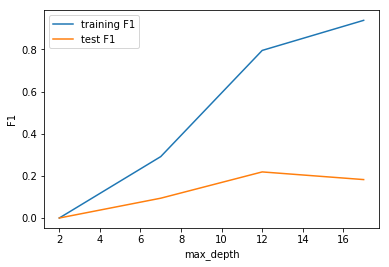

In [160]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("max_depth")
plt.ylabel("F1")
plt.legend()
plt.show()

As we can see increasing the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### Tuning n_estimators

Trying to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [163]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400 )}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [164]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.630424,0.027681,0.0,0.0,100,{'n_estimators': 100},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600330,0.003706,0.0,0.0
1,11.734998,0.111472,0.0,0.0,500,{'n_estimators': 500},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.232018,0.009540,0.0,0.0
2,22.482874,0.213607,0.0,0.0,900,{'n_estimators': 900},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.158663,0.023429,0.0,0.0
3,31.196215,0.290106,0.0,0.0,1300,{'n_estimators': 1300},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.383236,0.026816,0.0,0.0


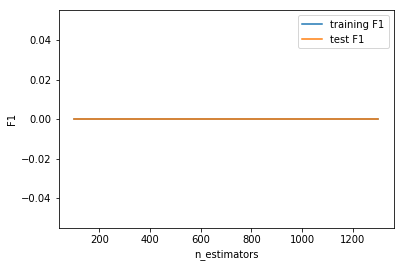

In [165]:
# plotting scores with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("n_estimators")
plt.ylabel("F1")
plt.legend()
plt.show()

n_estimator does not have any impact

#### Tuning max_features

In [166]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32 ,36 ,40 ,44 ,52]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44, 52]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [167]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.234683,0.008935,0.000000,0.000000,4,{'max_features': 4},10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036656,0.005025,0.000000,0.000000
1,0.305079,0.008830,0.000000,0.000573,8,{'max_features': 8},10,0.000000,0.000000,0.000000,0.002865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049396,0.007283,0.000000,0.001146
2,0.550917,0.009038,0.002285,0.010816,14,{'max_features': 14},9,0.000000,0.017021,0.000000,0.008571,0.000000,0.011396,0.011429,0.014225,0.000000,0.002865,0.117279,0.005764,0.004571,0.004873
3,0.544747,0.003404,0.018080,0.031791,20,{'max_features': 20},7,0.011364,0.008584,0.044944,0.058172,0.011364,0.047619,0.022727,0.041725,0.000000,0.002857,0.029923,0.000378,0.015234,0.022004
4,0.609661,0.003628,0.017804,0.046132,24,{'max_features': 24},8,0.011173,0.042135,0.033898,0.047420,0.000000,0.058011,0.000000,0.014225,0.043956,0.068871,0.015360,0.000825,0.018003,0.018406


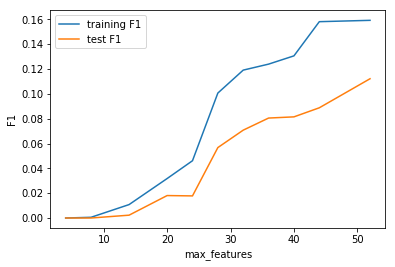

In [168]:
# plotting scores with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("max_features")
plt.ylabel("F1")
plt.legend()
plt.show()

As we can see increasing max_feature score for training score keeps on increasing and test score is increasing till a certain point then it is stabilized

### Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node

In [169]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [170]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.291541,0.004005,0.0,0.0,100,{'min_samples_leaf': 100},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011558,0.000284,0.0,0.0
1,0.251063,0.003894,0.0,0.0,150,{'min_samples_leaf': 150},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006116,0.000200,0.0,0.0
2,0.238568,0.003796,0.0,0.0,200,{'min_samples_leaf': 200},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010096,0.000209,0.0,0.0
3,0.216665,0.003966,0.0,0.0,250,{'min_samples_leaf': 250},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009540,0.000811,0.0,0.0
4,0.204169,0.003411,0.0,0.0,300,{'min_samples_leaf': 300},1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005230,0.000019,0.0,0.0


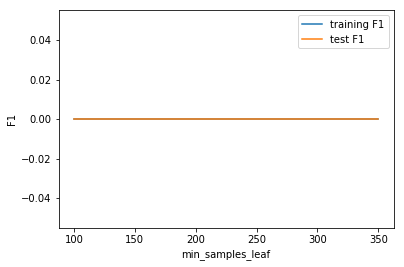

In [171]:
# plotting scores with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("min_samples_leaf")
plt.ylabel("F1")
plt.legend()
plt.show()

min_leaf_size does not seem to be impacting the outcome.

### Tuning min_samples_split

In [172]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [173]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.495537,0.004599,0.002286,0.014193,200,{'min_samples_split': 200},1,0.0,0.002869,0.011429,0.011396,0.0,0.016997,0.0,0.025460,0.0,0.014245,0.054537,0.000802,0.004572,0.007360
1,0.480571,0.004145,0.002286,0.003431,250,{'min_samples_split': 250},1,0.0,0.002869,0.011429,0.002861,0.0,0.008559,0.0,0.002865,0.0,0.000000,0.054448,0.000294,0.004572,0.002794
2,0.448339,0.004283,0.000000,0.005705,300,{'min_samples_split': 300},3,0.0,0.005731,0.000000,0.017070,0.0,0.000000,0.0,0.005722,0.0,0.000000,0.013368,0.000204,0.000000,0.006233
3,0.435056,0.004452,0.000000,0.001147,350,{'min_samples_split': 350},3,0.0,0.002869,0.000000,0.000000,0.0,0.000000,0.0,0.002865,0.0,0.000000,0.012728,0.000910,0.000000,0.001405
4,0.410655,0.003931,0.000000,0.000573,400,{'min_samples_split': 400},3,0.0,0.000000,0.000000,0.000000,0.0,0.002865,0.0,0.000000,0.0,0.000000,0.018194,0.000183,0.000000,0.001146


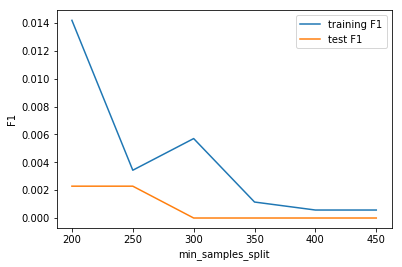

In [174]:
# plotting scores with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("min_samples_split")
plt.ylabel("F1")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [175]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,30,40,45]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [176]:
# Fit the grid search to the data
grid_search.fit(df_train_pca2, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 53.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10, 30, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [177]:
# printing the optimal F1 score and hyperparameters
print('We can get F1 of',grid_search.best_score_,'using',grid_search.best_params_)

We can get F1 of 0.9251870324189526 using {'max_depth': 8, 'max_features': 40, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


##### Fitting the final model with the best parameters obtained from grid search.

In [178]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=40,
                             n_estimators=100)

In [179]:
# fit
rfc.fit(df_train_pca2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=40, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
# predict
predictions = rfc.predict(df_test_pca2)

In [181]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96      4579
          1       0.54      0.08      0.14       405

avg / total       0.89      0.92      0.89      4984



In [183]:
print(confusion_matrix(y_test,predictions))

[[4552   27]
 [ 373   32]]


The sensitivity of this random forrest model is lower than the PCA + Logistic regression model. Hence we chose the PCA+ Logistic regression model for predicting Churn